# Lab 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy.io.wavfile as wav
import simpleaudio as sa

### Task 1 - Using the FFT Function

In [3]:
def fftTrans(f):
    n = np.arange(0,128,1)
    fs = 10000
    x = 1 + np.cos(2*np.pi*f*n)
    x_fft = fftpack.fft(x)
    w_fft = np.linspace(0, 2 * np.pi, len(n))
    mag = np.abs(x_fft)
    fig1 = plt.figure(1, figsize=(6,12))
    fig1.subplots_adjust(hspace = 0.5, wspace = 0.5)
    plt.subplot(3,1,1)
    plt.stem(w_fft, mag)
    plt.title('Unshifted FFT with f = {} HZ'.format(f))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')
    
    x_fftshift = fftpack.fftshift(x_fft)
    w_fftshift = np.linspace(-np.pi, np.pi, len(n))
    mag2 = np.abs(x_fftshift)
    plt.subplot(3,1,2)
    plt.stem(w_fftshift, mag2)
    plt.title('Shifted FFT with f = {} HZ'.format(f))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')
    
    f_fftshift = np.linspace(-0.5, 0.5, len(n))
    plt.subplot(3,1,3)
    plt.stem(f_fftshift, mag2)
    plt.title('Shifted FFT with f = {} HZ'.format(f))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')

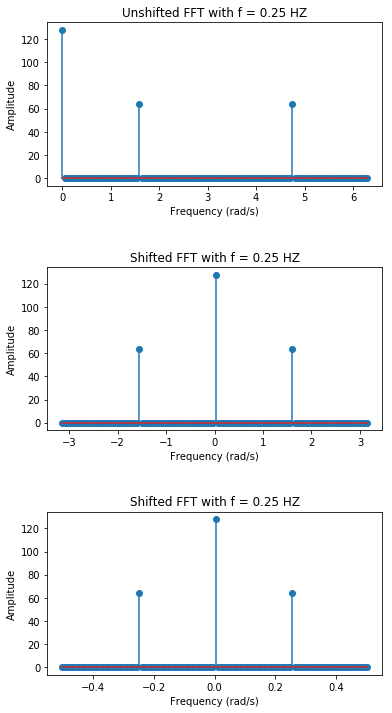

In [4]:
fftTrans(0.25)

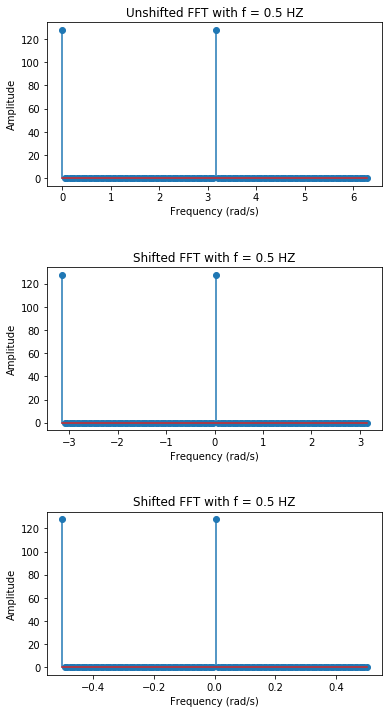

In [5]:
fftTrans(0.5)

### Task 2 - Frequency Shifting

In [6]:
def freqShift(x):
    f = np.linspace(-0.5, 0.5, len(n))
    x_fft = fftpack.fft(x)
    x_fftshift = fftpack.fftshift(x_fft)
    mag = np.abs(x_fftshift)
    angle = np.angle(x_fftshift)
    plt.figure(2)
    plt.subplot(2,1,1)
    plt.plot(f, mag)
    plt.subplot(2,1,2)
    plt.plot(f, angle)

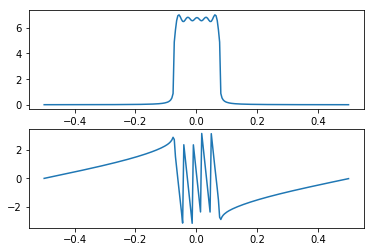

In [7]:
f = 0.15
n = np.arange(0,256,1)
freqShift(np.sinc(f*(n-32)))

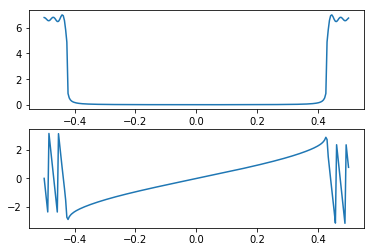

In [8]:
f = 0.15
n = np.arange(0,256,1)
freqShift(np.sinc(f*(n-32))*(-1)**n)

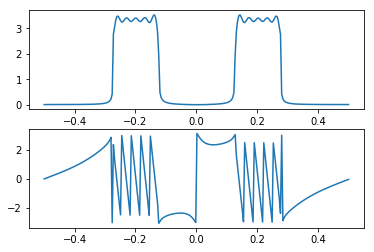

In [9]:
f = 0.15
n = np.arange(0,256,1)
freqShift(np.sinc(f*(n-32))*np.cos(2*np.pi*0.2*n))

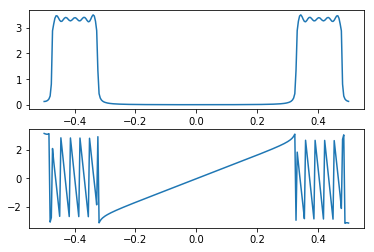

In [10]:
f = 0.15
n = np.arange(0,256,1)
freqShift(np.sinc(f*(n-32))*np.cos(2*np.pi*0.4*n))

### Discussion
A is a low pass filter.
B is a high pass filter.
C is a band pass filter.
D is a band pass filter.

### Task 3 - Starting from Continous Time Signals

In [11]:
def wav_load(file_name): 
    # Load the raw data. 
    sr, data = wav.read(file_name) 
    # Only use the first channel. 
    if data.ndim > 1: 
        data = data[:, 0] 
    
    # Convert to float32 quantization. 
    kind = data.dtype.kind 
    bits = data.dtype.itemsize * 8 
    data = data.astype('float32') 
    if kind == 'i' or kind == 'u': 
        data = data / 2 ** (bits - 1) 
        if kind == 'u': 
            data = data - 1 
    return sr, data

Text(0,0.5,'Amplitude')

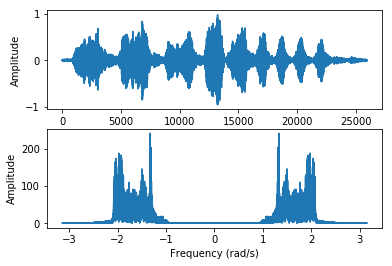

In [12]:
#Bird Original
sr, samples = wav_load('blm.wav')
sa.play_buffer((samples*32767).astype('int16'),1,2,sr).wait_done()

#plotting
plt.figure(3)
plt.subplot(2,1,1)
plt.plot(samples)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.subplot(2,1,2)
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

Text(0,0.5,'Amplitude')

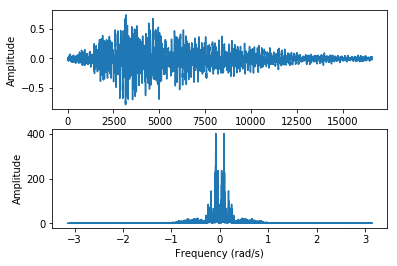

In [13]:
#Tiger Original
sr, samples = wav_load('tiger_fixed.wav')
sa.play_buffer((samples*32767).astype('int16'),1,2,sr).wait_done()

#plotting
plt.figure(4)
plt.subplot(2,1,1)
plt.plot(samples)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.subplot(2,1,2)
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')


Text(0,0.5,'Amplitude')

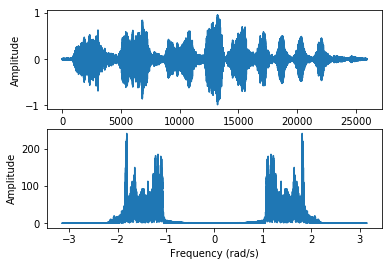

In [14]:
# Bird * (-1)**n
sr, samples = wav_load('blm.wav')
n = np.arange(0, len(samples), 1)
samples = samples*(-1)**n

sa.play_buffer((samples*32767).astype('int16'),1,2,sr).wait_done()

plt.figure(3)
plt.subplot(2,1,1)
plt.plot(samples)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.subplot(2,1,2)
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

Text(0,0.5,'Amplitude')

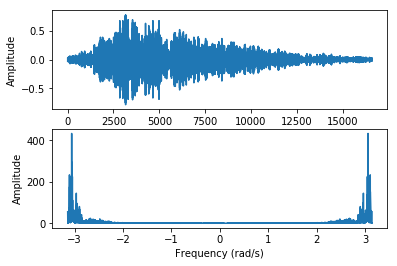

In [15]:
#Tiger * (-1)**n
sr, samples = wav_load('tiger_fixed.wav')
n = np.arange(0,len(samples),1)
samples = samples*(-1)**n
sa.play_buffer((samples*32767).astype('int16'),1,2,sr).wait_done()

plt.figure(4)
plt.subplot(2,1,1)
plt.plot(samples)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.subplot(2,1,2)
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

Text(0,0.5,'Amplitude')

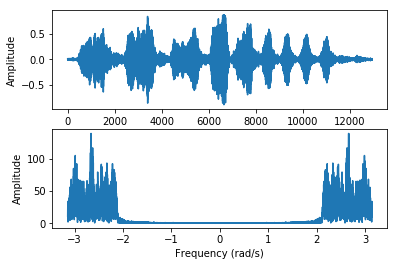

In [16]:
#Bird y[n] = x[2n]

sr, samples = wav_load('blm.wav')
samples = samples[::2]
sa.play_buffer((samples*32767).astype('int16'),1,2,sr).wait_done()

#plotting
plt.figure(3)
plt.subplot(2,1,1)
plt.plot(samples)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.subplot(2,1,2)
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')


Text(0,0.5,'Amplitude')

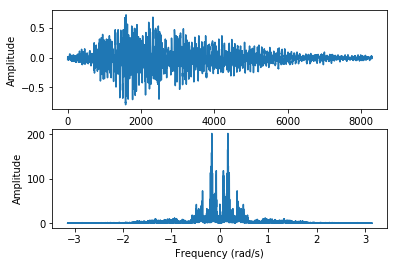

In [17]:
#Tiger y[n] = x[2n]
sr, samples = wav_load('tiger_fixed.wav')
samples = samples[::2]
sa.play_buffer((samples*32767).astype('int16'),1,2,sr).wait_done()

plt.figure(4)
plt.subplot(2,1,1)
plt.plot(samples)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.subplot(2,1,2)
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

C:\Users\nahum\EE235\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

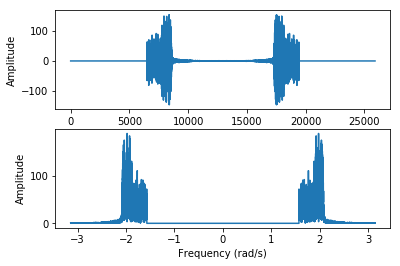

In [21]:
#Bird High Pass Filter
sr, samples = wav_load('blm.wav')
f_c = 0.25
size = len(samples)
zero_out = np.zeros(int(size/2)+1)
pass_band = np.ones(int(size/4))
filt = np.concatenate([pass_band, zero_out, pass_band])
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
final = fftshift * filt

sa.play_buffer((samples*32767).astype('int16'),1,2,sr).wait_done()
i_fftshift = fftpack.ifftshift(final)
#plotting
plt.figure(3)
plt.subplot(2,1,1)
plt.plot(i_fftshift)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
# w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
# fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.subplot(2,1,2)
plt.plot(w_fftshift, np.abs(final))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

C:\Users\nahum\EE235\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

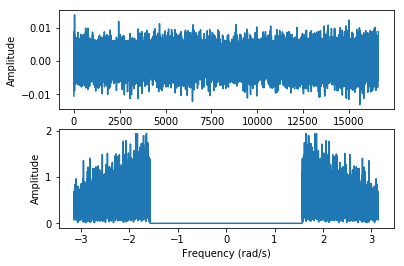

In [25]:
#Tiger High Pass Filter
sr, samples = wav_load('tiger_fixed.wav')
size = len(samples)
zero_out = np.zeros(int(size/2)+1)
pass_band = np.ones(int(size/4))
filt = np.concatenate([pass_band, zero_out, pass_band])
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
final = fftshift * filt

sa.play_buffer((samples*32767).astype('int16'),1,2,sr).wait_done()
i_fftshift = fftpack.ifft(fftpack.ifftshift(final))
#plotting
plt.figure(3)
plt.subplot(2,1,1)
plt.plot(i_fftshift)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
# w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
# fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.subplot(2,1,2)
plt.plot(w_fftshift, np.abs(final))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')